In [ ]:
import pandas as pd
import numpy as  np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('Iris.csv')

In [ ]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.shape

(150, 6)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [ ]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [ ]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

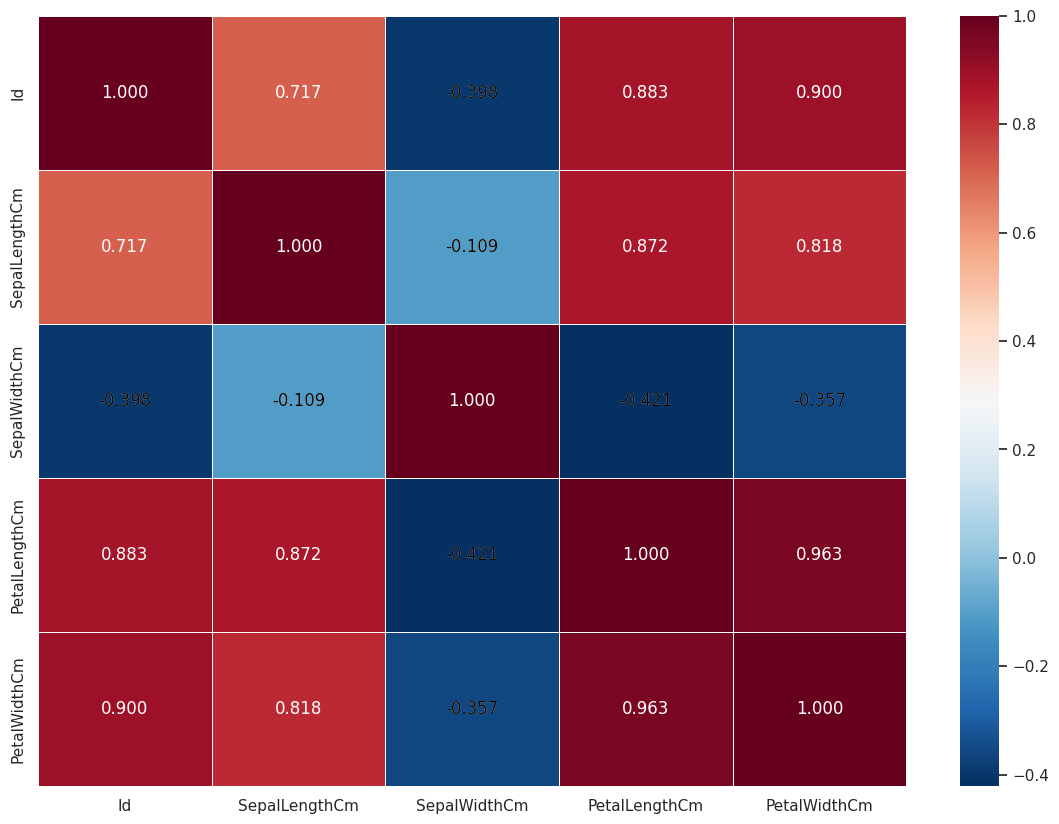

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(14, 10))

# Generate the correlation matrix
corr_mat = df.corr()

# Create the heatmap
sns.heatmap(corr_mat, annot=True, cmap="RdBu_r", fmt=".3f", linewidths=0.4)

# Set a threshold for text coloring
corr_threshold = 0.6

# Loop through the correlation matrix to add text annotations
for row in range(corr_mat.shape[0]):
    for col in range(corr_mat.shape[1]):
        if row != col and abs(corr_mat.iloc[row, col]) < corr_threshold:
            plt.text(col + 0.5, row + 0.5, f"{corr_mat.iloc[row, col]:.3f}",
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="black")

# Show the plot
plt.show()

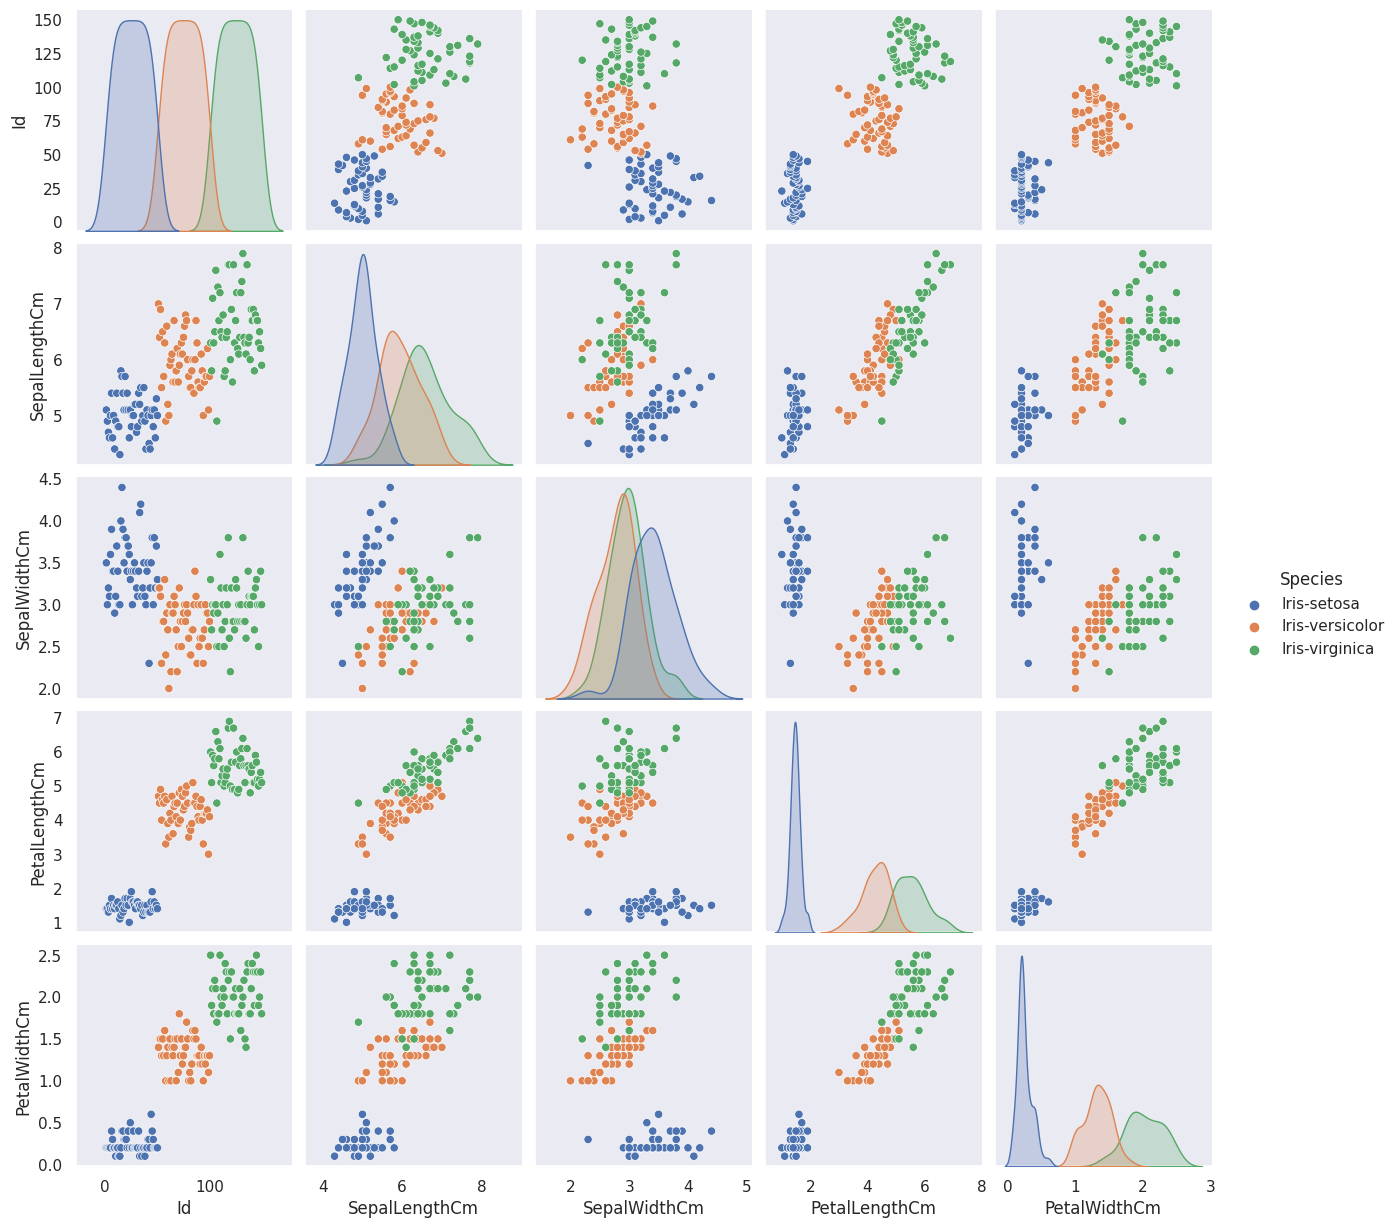

In [ ]:
sns.set(style="dark")
sns.pairplot(df, hue="Species")
plt.show()

In [ ]:
x=df.iloc[:,:-4].values
y=df.iloc[:,-4].values
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,88,6.3,2.3,4.4,1.3
1,2,4.9,3.0,1.4,0.2
130,131,7.4,2.8,6.1,1.9
117,118,7.7,3.8,6.7,2.2
35,36,5.0,3.2,1.2,0.2
...,...,...,...,...,...
57,58,4.9,2.4,3.3,1.0
49,50,5.0,3.3,1.4,0.2
11,12,4.8,3.4,1.6,0.2
12,13,4.8,3.0,1.4,0.1


In [ ]:
x_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
97,98,6.2,2.9,4.3,1.3
42,43,4.4,3.2,1.3,0.2
144,145,6.7,3.3,5.7,2.5
24,25,4.8,3.4,1.9,0.2
98,99,5.1,2.5,3.0,1.1
134,135,6.1,2.6,5.6,1.4
13,14,4.3,3.0,1.1,0.1
9,10,4.9,3.1,1.5,0.1
92,93,5.8,2.6,4.0,1.2
78,79,6.0,2.9,4.5,1.5


In [ ]:
y_train

87     Iris-versicolor
1          Iris-setosa
130     Iris-virginica
117     Iris-virginica
35         Iris-setosa
            ...       
57     Iris-versicolor
49         Iris-setosa
11         Iris-setosa
12         Iris-setosa
17         Iris-setosa
Name: Species, Length: 120, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_logreg = model1.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ", accuracy_logreg)

Accuracy (Logistic Regression):  93.33333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
accuracy_decision_tree = model3.score(x_test, y_test) * 100
print("Accuracy (Decision Tree): ", accuracy_decision_tree)

Accuracy (Decision Tree):  96.66666666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
accuracy_knn = model2.score(x_test, y_test) * 100
print("Accuracy (KNN): ", accuracy_knn)

Accuracy (KNN):  96.66666666666667


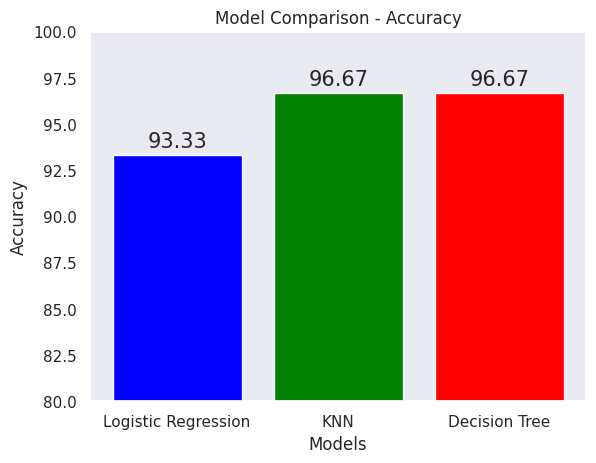

In [ ]:
# Round the accuracy values to two decimal places
accuracy_logreg = round(accuracy_logreg, 2)
accuracy_knn = round(accuracy_knn, 2)
accuracy_decision_tree = round(accuracy_decision_tree, 2)

# Model names and accuracies
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy_logreg, accuracy_knn, accuracy_decision_tree]

# Create the bar chart
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([80, 100])  # Adjust the y-axis limits if needed

# Annotate the bars with the accuracy values
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=15)

# Show the plot
plt.show()